# Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

X_seen=np.load('X_seen.npy', encoding = 'latin1') #	(40 x N_i x D): 40 feature matrices. X_seen[i] is the N_i x D feature matrix of seen class i

Xtest=np.load('Xtest.npy', encoding = 'latin1')#	(6180, 4096): feature matrix of the test data.

Ytest=np.load('Ytest.npy',encoding = 'latin1')#	(6180, 1): ground truth labels of the test data

class_attributes_seen=np.load('class_attributes_seen.npy', encoding = 'latin1')#	(40, 85): 40x85 matrix with each row being the 85-dimensional class attribute vector of a seen class.

class_attributes_unseen=np.load('class_attributes_unseen.npy', encoding = 'latin1')#	(10, 85): 10x85 matrix with each row being the 85-dimensional class attribute vector of an  unseen class.



# Calculating mean of the seen data and storing it in seen_mean variable.

In [2]:
seen_mean = np.zeros((X_seen.shape[0],X_seen[0][1].shape[0]))
for i in range(X_seen.shape[0]):
    seen_mean[i] = (np.sum(X_seen[i], axis=0)/X_seen[i].shape[0])

# Linear regression model learning

In [3]:
def modeling(seen_mean, lamda, class_attribute_seen):
    I= np.identity(class_attribute_seen.shape[1])
    X = inv(np.dot(np.transpose(class_attributes_seen),class_attributes_seen)+ lamda * I)
    W = np.dot(np.dot(X,np.transpose(class_attributes_seen)),seen_mean)
    return (W)

# Calculate mean of unseen class

In [4]:
def calculate_mean_unseen(class_attributes_unseen,W):
    mean_unseen = np.dot(class_attributes_unseen, W)
    return (mean_unseen)

# Making Prediction at provided lamda and returns accuracy in Percent(%)

In [5]:
def prediction(Xtest,Ytest,mean_unseen):
    test = np.zeros(mean_unseen.shape[0])
    sahi = 0 
    for i in range(Xtest.shape[0]):
        for j in range(mean_unseen.shape[0]):
            test[j] = np.dot((mean_unseen[j]-Xtest[i]),(mean_unseen[j]-Xtest[i]))
        if(Ytest[i]-np.argmin(test)-1 == 0 ):
            sahi = sahi +1
    return(sahi*100/Ytest.shape[0])

# Main function  

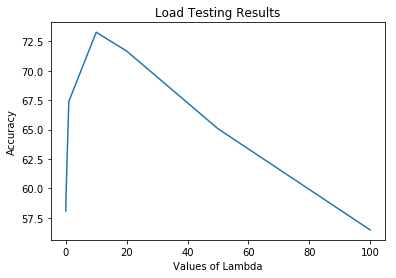

Best Accuracy:  73.284789644 at Lambda 10.0


In [6]:
def main():
    lamda = np.array([.01,0.1,1,10,20,50,100])
    result = []
    for i in range(lamda.shape[0]):
        W = modeling(seen_mean , lamda[i] ,class_attributes_seen) #modeling(seen_mean, lamda, class_attribute_seen)
        mean = calculate_mean_unseen(class_attributes_unseen , W) #calculate_mean_unseen(class_attributes_unseen,W)
        result.append((lamda[i], prediction(Xtest,Ytest,mean)))
    result = np.array(result)
    plt.title("Load Testing Results")
    plt.ylabel("Accuracy")
    plt.xlabel("Values of Lambda")
    plt.plot(result[:,[0]],result[:,[1]])
    plt.show()
    print("Best Accuracy: ", result[(np.argmax(result[:,[1]]))][1],"at Lambda" , lamda[np.argmax(result[:,[1]])])
main()